In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from pathlib import Path
data_path = Path('../data')

%matplotlib inline

In [2]:
data = pd.read_csv(data_path / 'house.csv')
data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## Grafico lineas

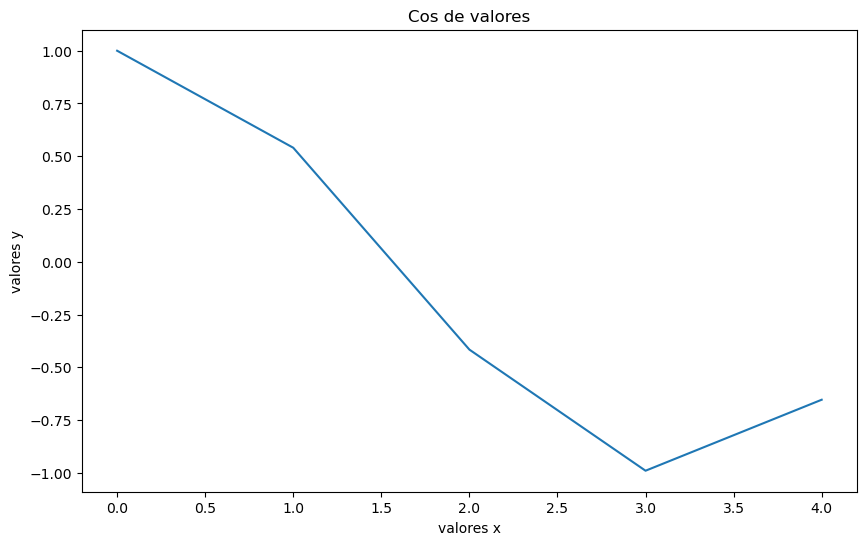

In [3]:

#fig = figure
#ax = axis
#figsize -> define el tamaño de la figura
fig, ax  = plt.subplots(figsize = (10,6))

x = np.arange(5)
y= np.cos(x)
ax.plot(x,y)
ax.set(xlabel = 'valores x',ylabel = 'valores y', title = 'Cos de valores');

## Gráficos de barras

In [4]:
#hago un conteo del numero de habitaciones para poder pintar el numero de habitaciones
num_bedrooms = data['bedrooms'].value_counts()
num_bedrooms

bedrooms
3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
8.0       2
0.0       2
9.0       1
Name: count, dtype: int64

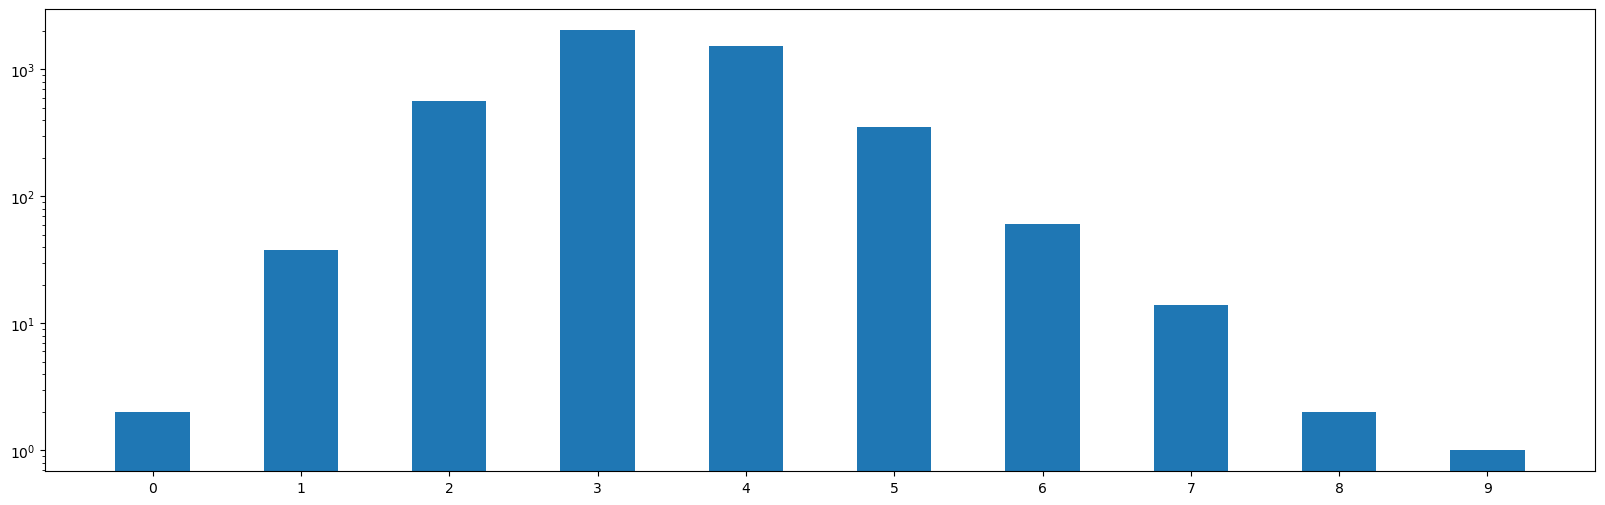

In [5]:
fig, ax = plt.subplots(figsize = (20,6))

#pintamos el grafico de barras, indicando eje x y eje y, podemos añadir ancho (width) y alineacion
ax.bar(x = num_bedrooms.index.values, height = num_bedrooms.values, width = 0.5, align='center')


ax.set_xticks(num_bedrooms.index.values);
#crear la escala y en indice logaritmico
ax.set_yscale('log')

## Histograma

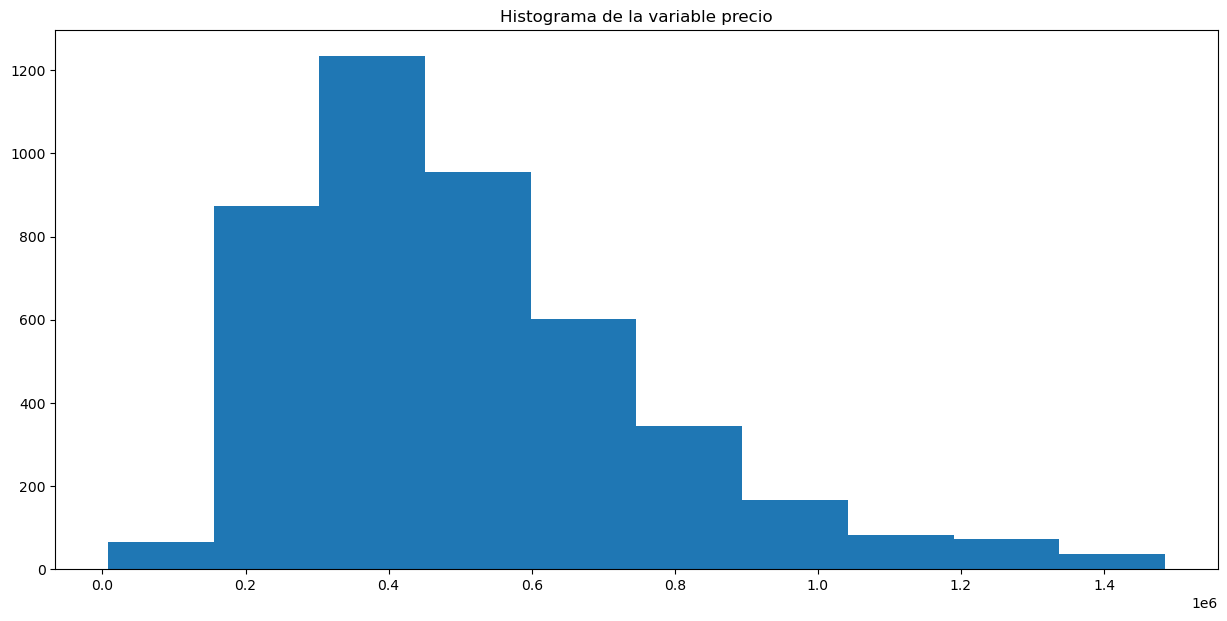

In [6]:
#Histograma de la variable precio 
price = data.query('price > 0 and price < 1_500_000')['price']

fig,ax = plt.subplots(figsize = (15,7))
#paso la serie lo que quiero que cree el histograma
#histograma nos permite definir el numero de bins que se van a usar
ax.hist(price, bins=10)
ax.set_title('Histograma de la variable precio');
#sirve para analizar distribuciones de los datos

## Grafico de puntos

In [7]:
data['condition'].unique()

array([3, 5, 4, 2, 1])

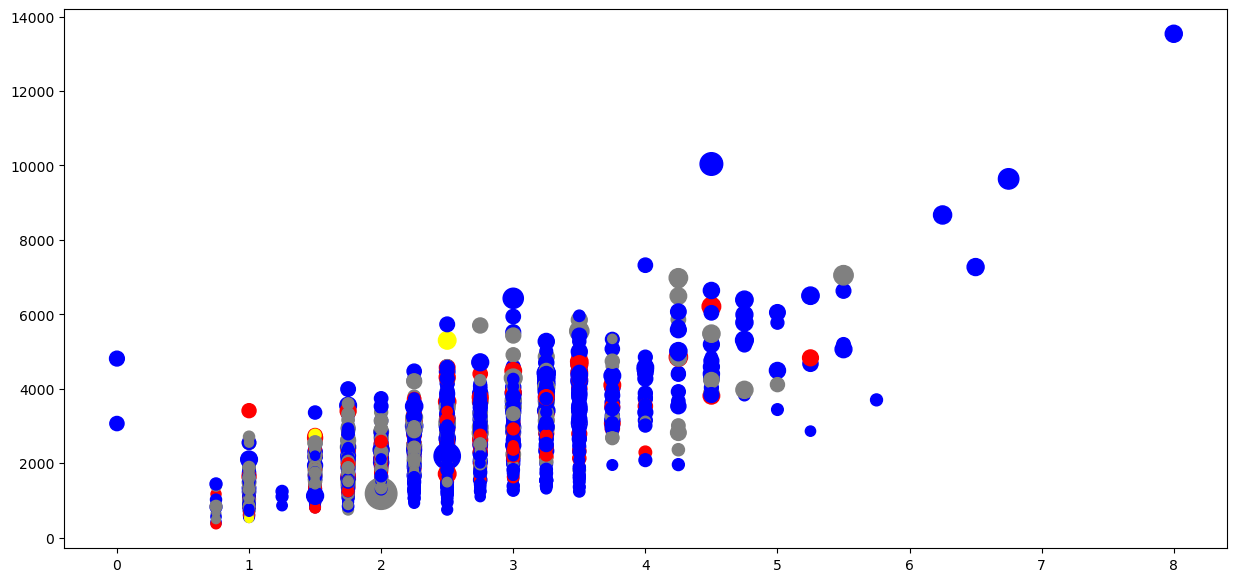

In [8]:
#Pintamos en el eje X el numero de baños y en el eje Y sqft_living
fig, ax = plt.subplots(figsize = (15,7))
x = data['bathrooms']
y = data['sqft_living']

#quiero variar el color segun la variable condition
color = ["", "green", "yellow", "blue", "gray", "red"]

#nos permite añadir modificaciones respecto al tamaño de los puntos
#si quiero que el punto sea mas grande segun el precio tengo que regular el volumen
vol = np.sqrt(data['price'])/10

#para generar el grafico de puntos, y aplicar volumen a los puntos segun el precio y color segun la variable condition
ax.scatter(x = x,y = y, s = vol, c = data['condition'].apply(lambda x : color[x]))



## Gráfico de tartas

In [9]:
cities = data.query('city in ("Seattle", "Renton", "Bellevue", "Redmond", "Issaquah")')
value_counts = cities['city'].value_counts(normalize = True)#usamos normalize apra que nos devuelva lss porcentajes de cada una de las ciudades
value_counts

city
Seattle     0.611111
Renton      0.113831
Bellevue    0.111111
Redmond     0.091298
Issaquah    0.072650
Name: proportion, dtype: float64

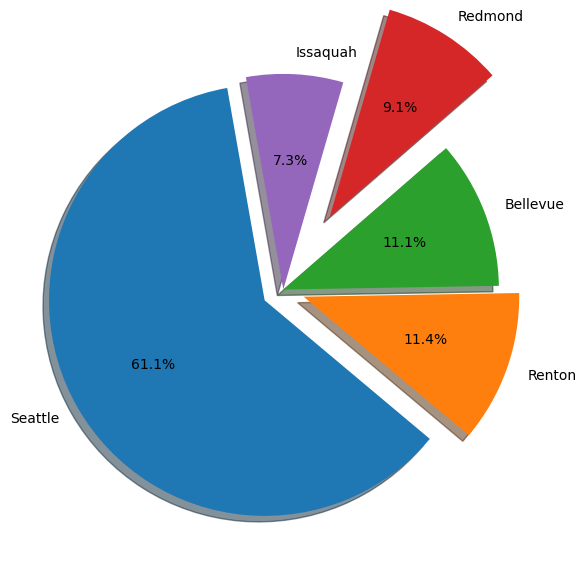

In [10]:
fig,ax = plt.subplots(figsize = (15,7))
#Establece la distancia de separacion
explode = [0.1, 0.1, 0, 0.4, 0]
#dibujo el grafico
#shadow se reifiere a la sombra pintada
#startangle nos habla del angulo de giro
ax.pie(value_counts, labels = value_counts.index,explode = explode, shadow = True, autopct = '%1.1f%%' , startangle = 100);

## Gráfico de tablas

In [11]:
#ssolo vamos a coger las habitaciones 2,3 y 4
df = data.query('condition in (2,3,4) and bedrooms in (1,2,3)')
_ = df.pivot_table(index = 'condition', columns = 'bedrooms', values = 'price', aggfunc=np.count_nonzero)
_

bedrooms,1.0,2.0,3.0
condition,,,
2,4,11,9
3,23,340,1248
4,6,155,587


In [12]:
 #calculo el precio medio
price_mean = df.groupby('bedrooms')['price'].mean()
price_mean

bedrooms
1.0    270825.000000
2.0    384626.305381
3.0    481533.162858
Name: price, dtype: float64

Text(0, 0.5, 'Precio medio segun nº baños')

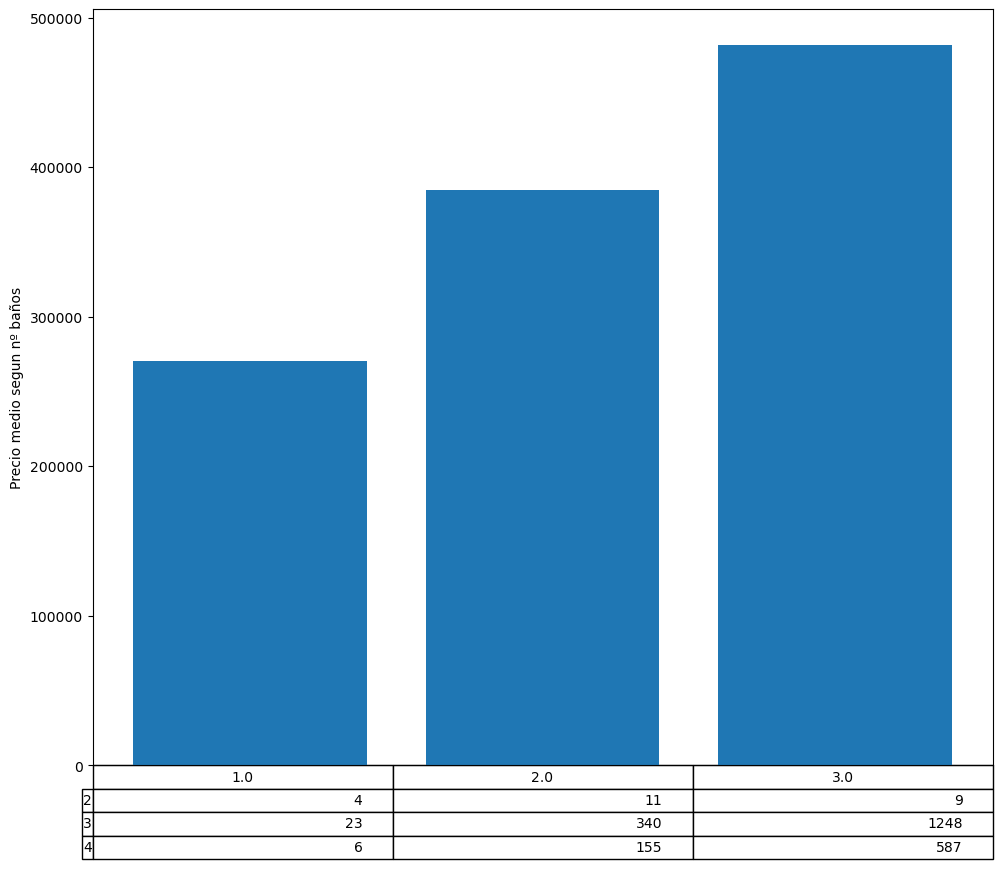

In [13]:
fig, ax = plt.subplots(figsize = (10, 7))

#pinto un grafico de barras
ax.bar(x = price_mean.index, height=price_mean.values)
#pinto una tabla debajo del grafico
ax.table(_.values, loc='bottom', rowLabels=_.index.values, colLabels=_.columns.values)

#establezco el ajuste de la situacion de la tabla
plt.subplots_adjust(left=0, bottom=-.2)
plt.xticks([])

plt.ylabel('Precio medio segun nº baños')